In [1]:
# Installs latest version of TensorFlow 2.X 
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

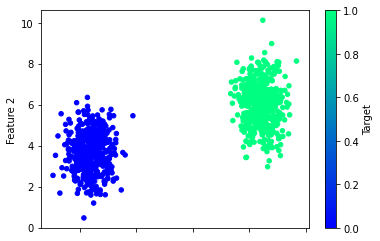

In [3]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()
# Fit the scaler
X_scaler.fit(X_train)
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model=tf.keras.models.Sequential()

In [7]:
nn_model.add(tf.keras.layers.Dense(units=1 , activation = "relu" , input_dim = 2))

In [8]:
# Add the output layer that uses a probability activation function. Classtification "Yes/No"
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
fit_model.

In [49]:
# Fit the model to the training data
nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 4ms/step - loss: 1.2733 - accuracy: 0.3480
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 0.9222 - accuracy: 0.4960
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6633 - accuracy: 0.6320
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.4887 - accuracy: 0.7680
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.8587
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.2975 - accuracy: 0.9387
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.9733
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9907
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.9960
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9973
Epoch 11/

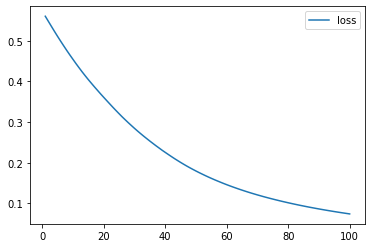

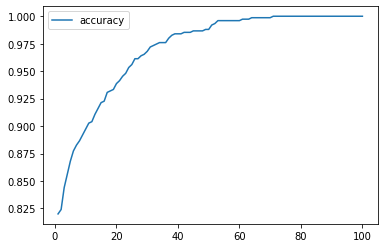

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
display(history_df.plot(y="loss"))
history_df.plot(y="accuracy")

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0691 - accuracy: 1.0000 - 44ms/epoch - 6ms/step
Loss: 0.06914273649454117, Accuracy: 1.0


In [43]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 20ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

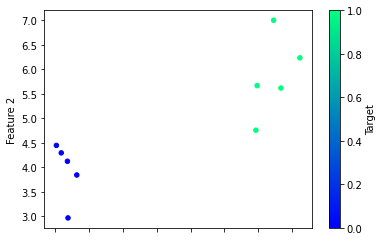

In [44]:
# Creating a DataFrame with the dummy data
df = pd.DataFrame(new_X, columns=["Feature 1", "Feature 2"])
df["Target"] = new_Y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1


array([[ 0.6762172 ,  0.81522039],
       [ 1.48714334, -0.21051853],
       [-1.02770863,  0.35496587],
       ...,
       [ 1.86504433,  0.08625586],
       [-0.83650701,  0.16733796],
       [ 0.76962525, -0.52529204]])

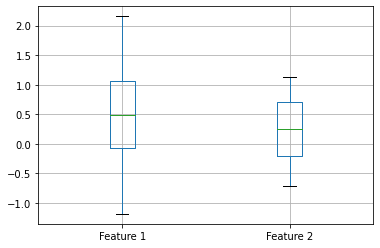

In [68]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons
display(df_moons.head())
# Plot the nonlinear dummy data
df_moons.boxplot(['Feature 1',"Feature 2"])
X_moons


In [46]:

# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [47]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 1.0969 - accuracy: 0.4760
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9121 - accuracy: 0.5120
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8011 - accuracy: 0.5507
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7284 - accuracy: 0.5800
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6743 - accuracy: 0.6067
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6311 - accuracy: 0.6240
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5942 - accuracy: 0.6440
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.6667
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5356 - accuracy: 0.6773
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5111 - accuracy: 0.6880
Epoch 11/

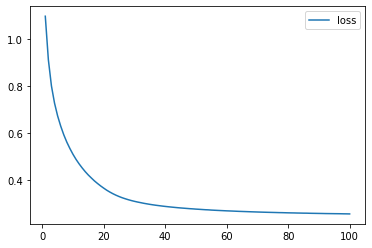

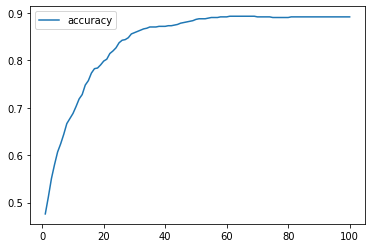

In [48]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
display(history_df.plot(y="accuracy")
)

In [50]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [51]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [52]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.6936 - accuracy: 0.5227
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.7880
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6439 - accuracy: 0.8387
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.8493
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.8480
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.8480
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.8520
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5200 - accuracy: 0.8680
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4956 - accuracy: 0.8720
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4719 - accuracy: 0.8773
Epoch 11/

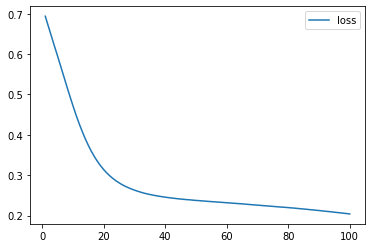

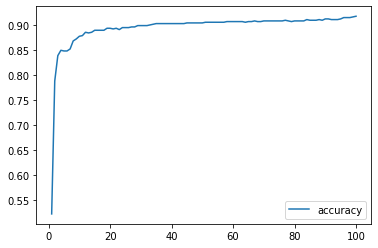

In [53]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(new_fit_model.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
display(history_df.plot(y="accuracy")
)